# HEP Plotter Gallery (1D)
Below are a collection of simple examples that demonstrate the capabilities of hepPlotter.  
This package is only meant to improve style and reduce time needed to make publication quality figures for HEP.  
Where possible, the API for matplotlib is used directly (the default options are modified to better suit HEP plots).  However, the user should still retain enough control to modify plots as needed.

First, ensure the environment has the proper path for this setup.   Nominally this would be used inside a CMSSW environment, so the import statements will vary.

In [1]:
import os
import sys

In [2]:
cwd = os.getcwd()
hpd = cwd.rstrip("/hepPlotter/examples")
if hpd not in sys.path:
    sys.path.insert(0,hpd)
    print("Added {0} to path!".format(hpd))
else:
    print("Already exists in path!")

Added /Users/demarley/Desktop/CERN/CMS/common to path!


## One dimensional Histograms
HEP plotter is designed to accept ROOT histograms (TH1 or TEfficiency) and then plot in a HEP-friendly format using matplotlib.  It is also possible to pass un-binned data directly (e.g., a numpy array) and a unique histogram will be generated.  However, by using histograms directly, HEP users can manipulate histograms using familiar analysis techniques before plotting them.

In [3]:
from hepPlotter.histogram1D import Histogram1D
import hepPlotter.tools as tools

%matplotlib inline

Welcome to JupyROOT 6.10/02


/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


We will now load toy data (example.root) and show some basic plots that you can make using this framework.

In [4]:
import ROOT
# uproot integration is on-going

In [5]:
f = ROOT.TFile.Open("example.root")

In [6]:
gauss   = f.Get("gauss")   # standard ROOT histogram (TH1D)
poisson = f.Get("poisson") # standard ROOT histogram (TH1D)

In these examples we want to compare two distributions and demonstrate the following features:

- style (errorbar/histogram)
- Ratio plot
- add extra text

First, let's make a basic plot showing two histograms

/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


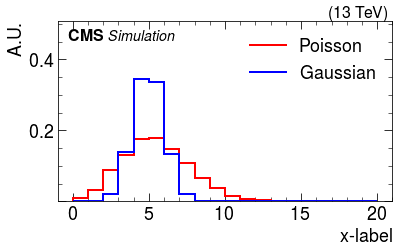

In [7]:
# Setup the plot (define some global settings)
hist = Histogram1D()

hist.normed  = True
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example1"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='step',color='red',edgecolor="red",
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='step',color='blue',edgecolor="blue",
         label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

In [8]:
#from IPython.display import IFrame
#IFrame("hist_lep_pt.pdf", width=600, height=300)

Let's plot the same histograms but change the plotting style to demonstrate how to pass matplotlib plotting options directly through hepPlotter.

/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:81: RuntimeWarning: invalid value encountered in divide
  error = h_data.error * (data/og_data)  # scale error bars


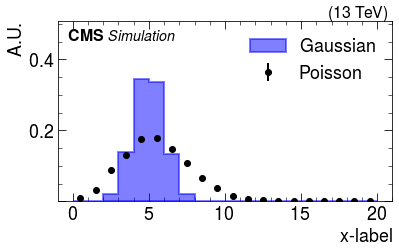

In [9]:
# Setup the plot
hist = Histogram1D()

hist.normed  = True
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example2"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='errorbar',label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',alpha=0.5,
         edgecolor="blue",label="Gaussian")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

#### Ratio Plots

Now let's add a ratio plot to compare the two distributions.  
There are two options:
1. Ratio = A/B
2. Significance = A/sqrt(B)

(These can be modified or extended in the `PlotterHist1D` class.)  
You need to tell hepPlotter which data will be used for the ratio calculation (the numerator/denominator).
This can be achieved through the `ratio` attribute of `PlotterHist1D()`. 
This attribute represents the `PlotterRatio()` class, defined in `PlotterHist1D.py`,
that contains simple attribute for storing information about what kind of ratio plot to make and what properties it will have.

To add a subplot representing the ratio/significance of two distributions, you will need to add the following commands before `hist.execute()` is called:

```
hist.ratio.value  = "ratio"  # "significance"
hist.ratio.ylabel = "A/B"    # r"A/$\sqrt{\text{B}}$"
hist.ratio.Add(numerator='poisson',denominator='gauss',**kwargs)
```
where `**kwargs` represents a dictionary of matplotlib options that you can pass to hepPlotter.  Such a feature is necessary if you want to plot the ratio/significance with a different plotting style than the default style (the 'numerator').  
An example is shown below.

/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:220: RuntimeWarning: divide by zero encountered in divide
  ratio_data.data.content = (num_data / den_data).copy()
/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:220: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.content = (num_data / den_data).copy()
/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:221: RuntimeWarning: divide by zero encountered in divide
  ratio_data.data.error   = (numerator.data.error / den_data).copy()
/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:221: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.error   = (numerator.data.error / den_data).copy()


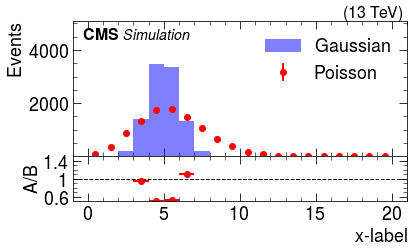

In [10]:
# Setup the plot
hist = Histogram1D()

hist.normed  = False
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example3"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

# Ratio plot -- see `HepPlotterRatio()` for all options
hist.ratio.value  = "ratio"      # "significance"
hist.ratio.ylabel = "A/B"        # r"A/$\sqrt{\text{B}}$"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='errorbar',mec='red',mfc="red",ecolor='red',
         label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',lw=0,alpha=0.5,
         edgecolor="blue",label="Gaussian")

# Add ratio plot
hist.ratio.Add(numerator='poisson',denominator='gauss')

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

These two plots aren't too similar, so you can see that the ratio is only ~1 for a few bins.

Finally, let's add some extra text to the plot.  This can be useful when you need to add labels that describe an event selection, final state, or some other analysis-specific information.

/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:224: RuntimeWarning: divide by zero encountered in divide
  ratio_data.data.content = (num_data / np.sqrt(den_data)).copy()
/Users/demarley/Desktop/CERN/CMS/common/hepPlotter/histogram1D.py:224: RuntimeWarning: invalid value encountered in divide
  ratio_data.data.content = (num_data / np.sqrt(den_data)).copy()


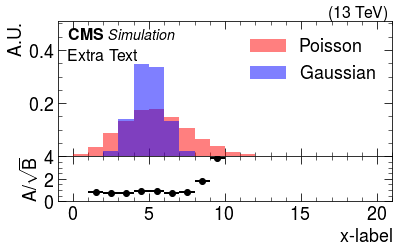

In [11]:
# Setup the plot
hist = Histogram1D()

hist.normed  = True
hist.stacked = False
hist.x_label = "x-label"
hist.y_label = "A.U." if hist.normed else "Events"
hist.saveAs  = "hist1d_jupyter_example4"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Extra Text",coords=[0.03,0.80])

# Ratio plot -- see `HepPlotterRatio()` for all options
hist.ratio.value  = "significance"         # "ratio" 
hist.ratio.ylabel = r"A/$\sqrt{\text{B}}$" # "A/B"

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add(poisson,name="poisson",
         draw_type='stepfilled',color='red',lw=0,alpha=0.5,
         edgecolor="red",label="Poisson")

# Add 'gauss' data to the plot from sample2
hist.Add(gauss,name="gauss",
         draw_type='stepfilled',color='blue',lw=0,alpha=0.5,
         edgecolor="blue",label="Gaussian")

# Add ratio plot -- modify some options to test the results
# NB: To switch plotting styles, use the keyword 'draw_type' just as in `hist.Add(...)`
hist.ratio.Add(numerator='poisson',denominator='gauss',draw_type='errorbar')

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

## One dimensional Efficiency Plots
Now that we have shown how to plot general histograms, let's look at TEfficiencies.  
From our ROOT file we will load the TEfficiency that we want to plot.  
The class `Efficiency1D` inherits from `Histogram1D` and adds just a few extra parameters specific to plotting TEfficiencies that is different from plotting TH1s.

In [12]:
from hepPlotter.efficiency1D import Efficiency1D
eff = f.Get("eff") # standard ROOT TEfficiency

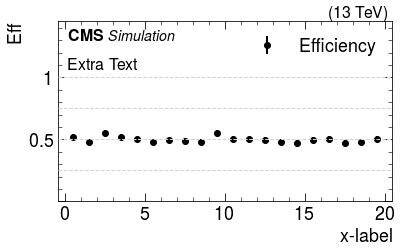

In [13]:
# Setup the plot
hist = Efficiency1D()

hist.normed  = False
hist.x_label = "x-label"
hist.y_label = "Eff"
hist.saveAs  = "eff1d_jupyter_example1"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Extra Text",coords=[0.03,0.80])

hist.initialize()   # sets the parameters of the plot

# Add 'eff' data to the plot
hist.Add(eff,name="eff",
         draw_type='errorbar',color='k',
         label="Efficiency")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

In addition to this simple plot, we can also plot TH1s with the TEfficiency.
This is particular useful if you're plotting something like a trigger efficiency as a function of jet pT and you want to plot the underlying jet pT distribution.  
To achieve this, simply include the histogram you want to also plot using the `hist.Add(...)` function.

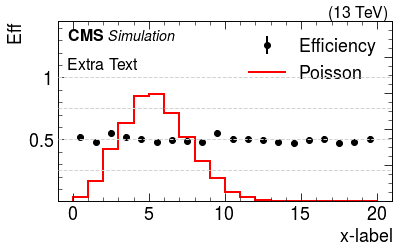

In [14]:
# Setup the plot
hist = Efficiency1D()

hist.normed  = False
hist.x_label = "x-label"
hist.y_label = "Eff"
hist.saveAs  = "eff1d_jupyter_example1"
hist.CMSlabel = 'top left'
hist.CMSlabelStatus = "Simulation"

# Add extra text onto the plot
# this is stored as a `PlotText()` object, defined in labels.py
# - kwargs are defined in `Text()` of labels.py
hist.extra_text.Add("Extra Text",coords=[0.03,0.80])

hist.initialize()   # sets the parameters of the plot

# Add 'eff' data to the plot
hist.Add(eff,name="eff",
         draw_type='errorbar',color='k',
         label="Efficiency")

# Add 'poisson' data as histogram ('underlying physics distribution')
hist.Add(poisson,name="poisson",
         draw_type='step',edgecolor='red',
         label="Poisson")

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it